# Sparsity of Lenna Frosen's Photo

Let's play around with the famous photo of "Lenna Forsén" which has been used a lot in the literature to illustrate various image processing algorithms.

In [ ]:
# !pip install pillow

We first import Lenna's photo

In [2]:
from PIL import Image
image_path = 'Colored_Photo/Lenna.png'

image = Image.open(image_path)

Let's look at the size of the image.

In [3]:
print(image.size)

(512, 512)


which is the standard size. We now convert it to an np.array:

In [4]:
import numpy as np

image_np = np.array(image.getdata())

Let's look at the data size

In [5]:
print(image_np.shape)

(262144, 3)


Well, we have three vectors. Each vector is one of the color channels. Let's first reshape it

In [6]:
image_rgb = image_np.reshape(512,512,3)
print(image_rgb.shape)

(512, 512, 3)


Now, we look at each color channel:

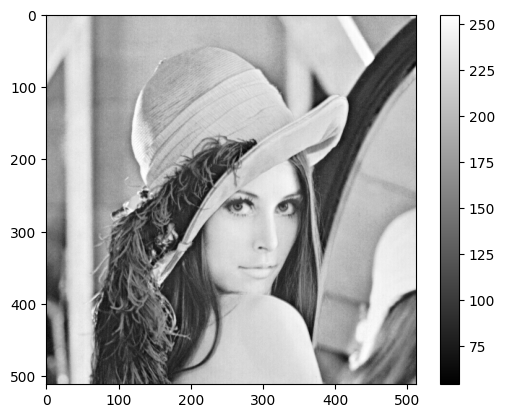

In [7]:
import matplotlib.pyplot as plt

# red channel
plt.imshow(image_rgb[:,:,0], cmap = 'gray')
plt.colorbar()

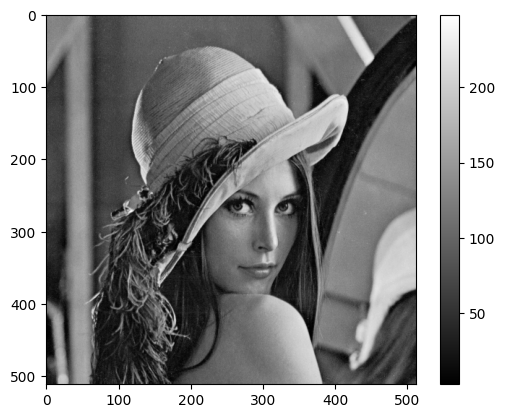

In [8]:
# green channel
plt.imshow(image_rgb[:,:,1], cmap = 'gray')
plt.colorbar()

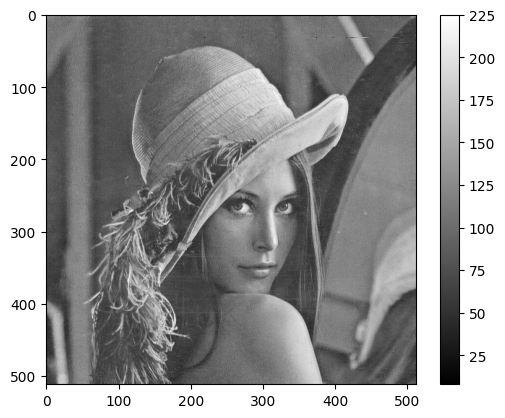

In [9]:
# blue channel
plt.imshow(image_rgb[:,:,2], cmap = 'gray')
plt.colorbar()

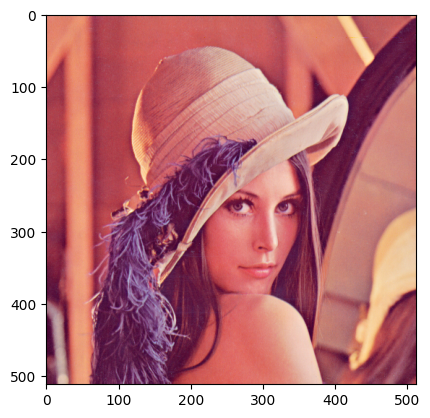

In [14]:
# all three channels together
plt.imshow(image_rgb)

We can now read the whole image as a single signal:

In [10]:
x = image_np.reshape(image_np.size,1)

We can now run our earlier code to find out the distribution of this signal.

<BarContainer object of 253 artists>

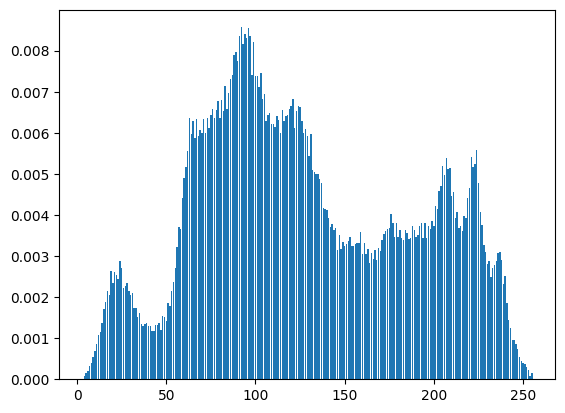

In [11]:
# First, we find the pixels (0:255, as we have an 8-bits image) and the frequency of each pixel 
(pix, freq) = np.unique(x, return_counts = True)
# Now we make an empirical distribution out of it
dist_x = np.array([pix , freq / x.size])

# and we plot it
plt.bar(dist_x[0,:], dist_x[1,:])

Well, it doesn't seem to be very sparse! What about the frequency domain?

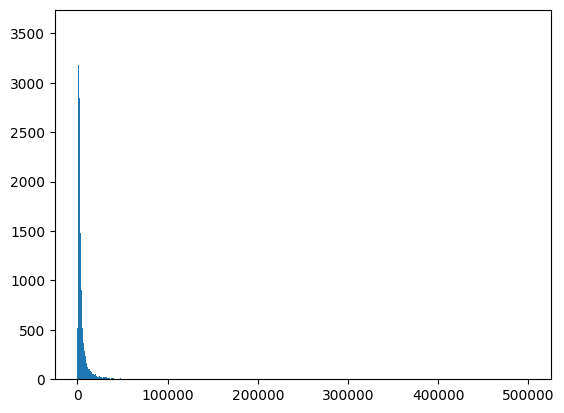

In [13]:
image_green = image_rgb[:,:,1]
image_fft_green = np.fft.fft2(image_green)

# Let's plot the histogram
x_fft = image_fft_green.reshape(image_fft_green.size,1)
x_fft_abs = np.abs(x_fft)
x_fft_angle = np.angle(x_fft)

hist = plt.hist(x_fft_abs, bins = 10000,range=(0,500000))
dist = hist[0]
bins_freq = hist[1]
plt.show()

Well! The frequency domain looks very sparse! This is what we have already seen with the MRI example.

## Exercise
Try to repeat what we did with the MRI image! This could be a nice practice.